In [1]:
# ==============================================================================
# Import modules
# ==============================================================================

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ==============================================================================
# Load data and select features Split into training and test data
# ==============================================================================
data = datasets.load_breast_cancer()
X = data.data
y = data.target
print(data.feature_names)

# Split data into training and test data (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# ==============================================================================
# Scale features using StandardScaler class in scikit-learn
# ==============================================================================

# Initialise standard scaler and compute mean and STD from training data
sc = StandardScaler()
sc.fit(X_train)

# Transform (standardise) both X_train and X_test with mean and stddev from
# training data
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

print("Mean of X_train_sc:", np.mean(X_train_sc, axis=0))
print("Stddev of X_train_sc:", np.std(X_train_sc, axis=0))

# df = pd.DataFrame(X_test_sc, columns=data.feature_names)
# df["target"] = y_test
# fig, ax = plt.subplots(1, 1, figsize=(20,4))
# sns.violinplot(df, ax=ax)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Mean of X_train_sc: [-2.34430008e-15  4.54773014e-15  1.92754802e-15  5.46742997e-16
  3.99457128e-15  3.28045798e-16  6.70875973e-17  3.70446276e-16
 -4.32610396e-15 -4.97424547e-15 -5.57901017e-17  2.39897437e-16
  1.84107336e-17  2.78950509e-17 -4.06151941e-16  6.18014852e-16
  1.76017771e-16  1.39028934e-15 -3.06789769e-15  6.66343028e-16
  2.23997258e-15  3.76025286e-16  3.08519263e-15 -3.94436019e-16
  5.99353063e-15 -2.78671558e-16  3

Accuracy test: 0.92
Accuracy train: 0.93
Accuracy test: 0.92
Accuracy train: 0.93
Accuracy test: 0.92
Accuracy train: 0.93
Accuracy test: 0.92
Accuracy train: 0.93
Accuracy test: 0.93
Accuracy train: 0.93
Accuracy test: 0.94
Accuracy train: 0.94
Accuracy test: 0.95
Accuracy train: 0.97
Accuracy test: 0.95
Accuracy train: 0.99
Accuracy test: 0.96
Accuracy train: 0.99
Accuracy test: 0.96
Accuracy train: 0.99
Accuracy test: 0.96
Accuracy train: 0.99
Accuracy test: 0.95
Accuracy train: 1.00
Accuracy test: 0.95
Accuracy train: 1.00
Accuracy test: 0.95
Accuracy train: 1.00
Accuracy test: 0.95
Accuracy train: 1.00
Accuracy test: 0.95
Accuracy train: 1.00
Accuracy test: 0.95
Accuracy train: 1.00
Accuracy test: 0.95
Accuracy train: 1.00


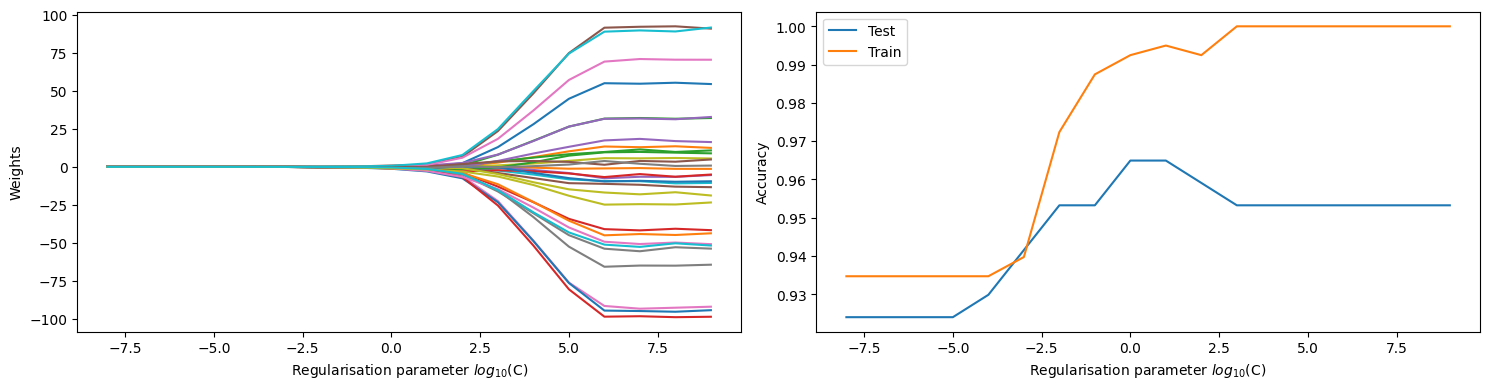

In [2]:
# ==============================================================================
# Train Logistic Regression model with different regularisation parameters
# ==============================================================================

c_range = np.arange(-8, 10, 1.0)
accuracy = np.zeros(shape=(2, len(c_range)))
weights = []

for index, c in enumerate(c_range):
    clf = LogisticRegression(
        max_iter=100, penalty="l2", solver="liblinear", multi_class="auto", random_state=1, C=10.0**c
    )
    clf.fit(X_train_sc, y_train)
    test_score = clf.score(X_test_sc, y_test)
    train_score = clf.score(X_train_sc, y_train)
    accuracy[0, index] = test_score
    accuracy[1, index] = train_score
    print(f"Accuracy test: {test_score:.2f}")
    print(f"Accuracy train: {train_score:.2f}")

    weights.append(clf.coef_[0])


fig, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].plot(c_range, weights)
ax[0].set_xlabel("Regularisation parameter $log_{10}$(C)")
ax[0].set_ylabel("Weights")


ax[1].plot(c_range, accuracy[0], label="Test")
ax[1].plot(c_range, accuracy[1], label="Train")
ax[1].set_xlabel("Regularisation parameter $log_{10}$(C)")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

fig.tight_layout()
plt.show()